In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("E-Commerce Shipping Data.csv")



In [77]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [78]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [79]:
## Converting Warehouse,Mode of Shipment,Product importance,Gender into the numeric form

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelEncoder_X = LabelEncoder()

# here we will convert warehouse mode into the label encoding because A,B,C are in the form order.

X.iloc[:,0] = labelEncoder_X.fit_transform(X.iloc[:,0]) 

columnTransformer = ColumnTransformer([('encoder',OneHotEncoder(),[1,6,7])],remainder='passthrough')


# here we will convert Mode of Shipment,Product importance,Gender into the oneHot Encoding because M,F is categorical.

X = np.array(columnTransformer.fit_transform(X), dtype =np.int)  



In [80]:
# Spliting Dataset into the TrainTest.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

#Now its time to feature scaling because some column have value 0,1,4521,45 so here we have to scale down these value for accurate result.


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)
name=[]
acc=[]

# Implementing Model

[[ 757  622]
 [ 609 1312]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1379
           1       0.68      0.68      0.68      1921

    accuracy                           0.63      3300
   macro avg       0.62      0.62      0.62      3300
weighted avg       0.63      0.63      0.63      3300

Accuracy: 62.696969696969695


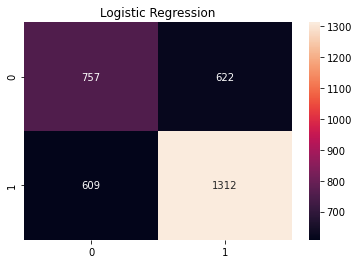

In [81]:
#Logistic Regression

# Apply on Training data
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
Logistic_classifier=LogisticRegression(random_state=0)
Logistic_classifier.fit(X_train,y_train)

# Now Test the model

y_pred=Logistic_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Logistic Regression'
plt.title(title)
plt.plot()

a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('LR')

print(f'Accuracy: {a}')

[[ 855  524]
 [ 622 1299]]
              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1379
           1       0.71      0.68      0.69      1921

    accuracy                           0.65      3300
   macro avg       0.65      0.65      0.65      3300
weighted avg       0.66      0.65      0.65      3300

Accuracy: 65.27272727272727


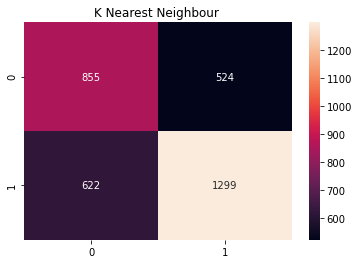

In [82]:
## K-Nearest Neigbour Classifier.


from sklearn.neighbors import KNeighborsClassifier
kNN_classifier=KNeighborsClassifier(n_neighbors=5)

kNN_classifier.fit(X_train, y_train)


y_pred=kNN_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'K Nearest Neighbour '
plt.title(title)
plt.plot()

a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('KNN')

print(f'Accuracy: {a}')


[[1043  336]
 [ 781 1140]]
              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1379
           1       0.77      0.59      0.67      1921

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.69      0.66      0.66      3300

Accuracy: 66.15151515151516


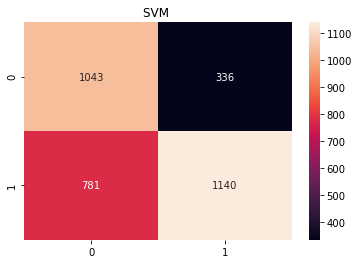

In [83]:
##SVM

from sklearn.svm import SVC
SVM_classifier = SVC(kernel="rbf",random_state=0)
SVM_classifier.fit(X_train, y_train)

SVM_classifier.fit(X_train, y_train)


y_pred=SVM_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'SVM '
plt.title(title)
plt.plot()


a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('SVM')

print(f'Accuracy: {a}')


[[ 771  608]
 [ 566 1355]]
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1379
           1       0.69      0.71      0.70      1921

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300

Accuracy: 64.42424242424242


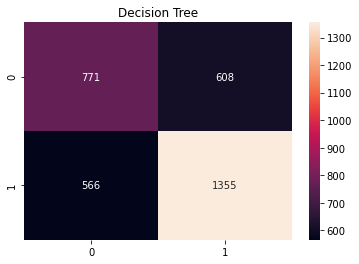

In [84]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
DT_classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
DT_classifier.fit(X_train,y_train)

y_pred=DT_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap 

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Decision Tree'
plt.title(title)
plt.plot()
a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('DT')
print(f'Accuracy: {a}')


[[ 972  407]
 [ 699 1222]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64      1379
           1       0.75      0.64      0.69      1921

    accuracy                           0.66      3300
   macro avg       0.67      0.67      0.66      3300
weighted avg       0.68      0.66      0.67      3300

Accuracy: 66.48484848484848


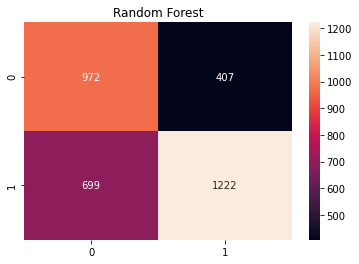

In [85]:
## Random Forest

from sklearn.ensemble import RandomForestClassifier
Random_classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
Random_classifier.fit(X_train,y_train)

y_pred=Random_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap 

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Random Forest'
plt.title(title)
plt.plot()
a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('RF')
print(f'Accuracy: {a}')

[[1322   57]
 [1097  824]]
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      1379
           1       0.94      0.43      0.59      1921

    accuracy                           0.65      3300
   macro avg       0.74      0.69      0.64      3300
weighted avg       0.77      0.65      0.63      3300

Accuracy: 65.03030303030303


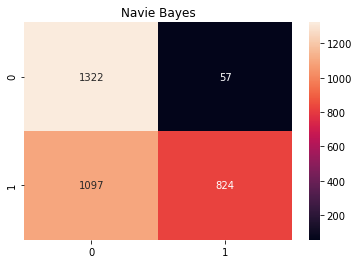

In [86]:
### Navie Bayes Classifier

from sklearn.naive_bayes import GaussianNB
Navie_classifier = GaussianNB()
Navie_classifier.fit(X_train, y_train)


y_pred=Navie_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

# Report of Classification: Precision, Recall, F-measure, report,accuracy
print(classification_report(y_test,y_pred))

# Ploting with heatmap 

import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
title = 'Navie Bayes'
plt.title(title)
plt.plot()

a=accuracy_score(y_test, y_pred)*100
acc.append(a)
name.append('Naive Bayes')
print(f'Accuracy: {a}')


[]

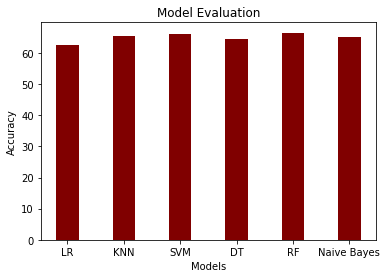

In [87]:
plt.bar(name,acc,color='maroon',width=0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.plot()